<a href="https://colab.research.google.com/github/Swathi1309/Data_Analytics/blob/main/Predicting%20Car%20Quality%20Using%20Decision%20Trees/Decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying the Car Evaluation Dataset Using a Decision Tree Algorithm

## Import Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns

!pip install -U imbalanced-learn
import imblearn
from imblearn.over_sampling import SMOTEN

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, plot_confusion_matrix, roc_auc_score

!pip install dtreeviz
from dtreeviz.trees import *

import graphviz

## Utility functions, for data visualzation

In [3]:
# Plotting the distribution of all features
def plot_dist(data):
  print ("Number of data points = ", data.shape[0])
  print ("Distribution of data points:")
  rows = int(np.ceil(data.shape[1]/4))
  fig, ax = plt.subplots(rows, 4, figsize = (12,rows*3))
  i = 0
  j = 0
  for column in data:
    data[column].value_counts().plot.pie(ax=ax[i][j])
    if j<3:
      j += 1
    else:
      i += 1
      j = 0
  while j<=3:
    ax[i][j].set_axis_off()
    j+=1

## Importing the data, data cleaning, augmentation, and visualization

Number of data points =  1727
Distribution of data points:
Number of data points =  3396
Distribution of data points:


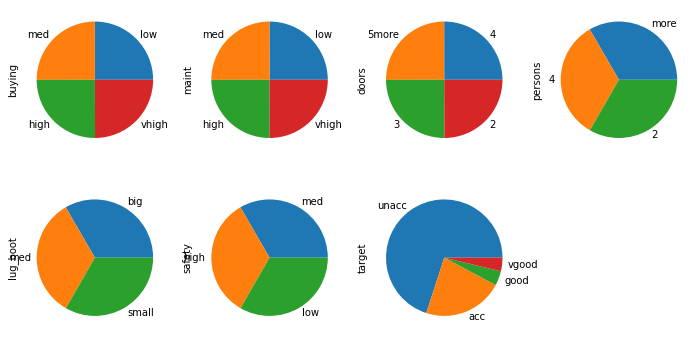

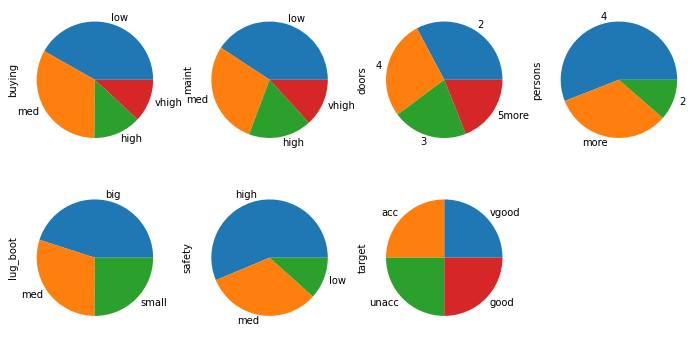

In [4]:
data = pd.read_csv("car_evaluation.csv")
data.columns=["buying", "maint","doors","persons","lug_boot","safety", "target"]

# Preliminary data analytics
plot_dist(data)

X = data[["buying", "maint","doors","persons","lug_boot","safety"]]
Y = data["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# Over Sampling data using SMOTE
sm = SMOTEN(random_state=42)
X_aug, Y_aug = sm.fit_resample(X_train, Y_train)
aug_data = pd.concat([X_aug, Y_aug], axis=1)
test_data = pd.concat([X_test, Y_test], axis=1)

# Data Analytics for Over Sampled Data
plot_dist(aug_data)

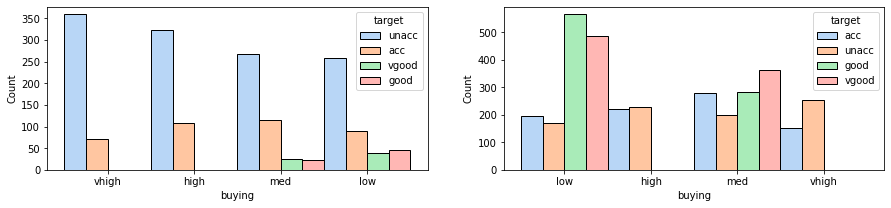

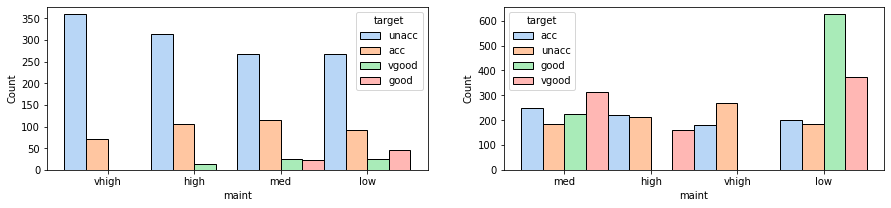

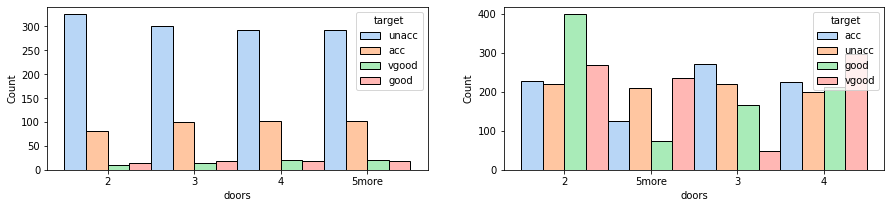

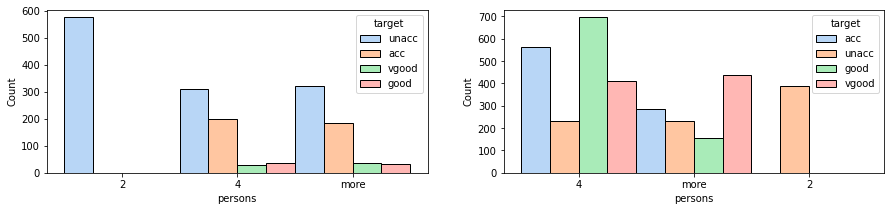

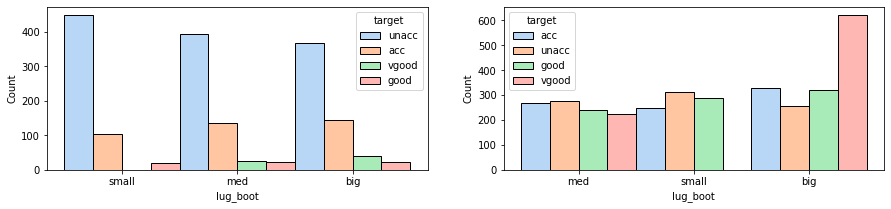

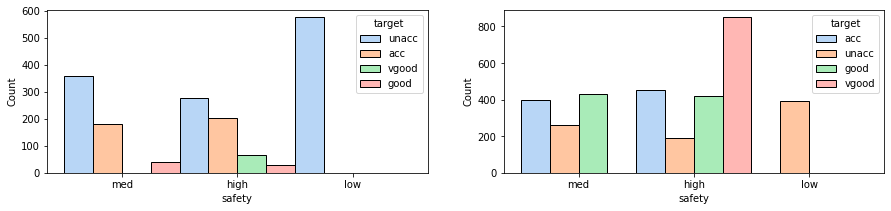

In [5]:
# Plotting each feature wrt the target variable
fig, ax = plt.subplots(1, 2, figsize=(15,3))
sns.histplot(x="buying", hue="target", data=data, multiple="dodge", palette="pastel", ax=ax[0]);
sns.histplot(x="buying", hue="target", data=aug_data, multiple="dodge", palette="pastel", ax=ax[1]);

fig, ax = plt.subplots(1, 2, figsize=(15,3))
sns.histplot(x="maint", hue="target", data=data, multiple="dodge", palette="pastel", ax=ax[0]);
sns.histplot(x="maint", hue="target", data=aug_data, multiple="dodge", palette="pastel", ax=ax[1]);

fig, ax = plt.subplots(1, 2, figsize=(15,3))
sns.histplot(x="doors", hue="target", data=data, multiple="dodge", palette="pastel", ax=ax[0]);
sns.histplot(x="doors", hue="target", data=aug_data, multiple="dodge", palette="pastel", ax=ax[1]);

fig, ax = plt.subplots(1, 2, figsize=(15,3))
sns.histplot(x="persons", hue="target", data=data, multiple="dodge", palette="pastel", ax=ax[0]);
sns.histplot(x="persons", hue="target", data=aug_data, multiple="dodge", palette="pastel", ax=ax[1]);

fig, ax = plt.subplots(1, 2, figsize=(15,3))
sns.histplot(x="lug_boot", hue="target", data=data, multiple="dodge", palette="pastel", ax=ax[0]);
sns.histplot(x="lug_boot", hue="target", data=aug_data, multiple="dodge", palette="pastel", ax=ax[1]);

fig, ax = plt.subplots(1, 2, figsize=(15,3))
sns.histplot(x="safety", hue="target", data=data, multiple="dodge", palette="pastel", ax=ax[0]);
sns.histplot(x="safety", hue="target", data=aug_data, multiple="dodge", palette="pastel", ax=ax[1]);

In [6]:
# Converting to encoder variables
for column in aug_data:
  encoder = LabelEncoder()
  encoder.fit(aug_data[column])
  aug_data[column] = encoder.transform(aug_data[column])
  test_data[column] = encoder.transform(test_data[column])
  print ("\n", column,":")
  if column=="persons" or column=="lug_boot" or column=="safety":
    ls = encoder.inverse_transform([0,1,2])
  else:
    ls = encoder.inverse_transform([0,1,2,3])
  for i in range(len(ls)):
    print ("\t", i,":",ls[i], end=";")


 buying :
	 0 : high;	 1 : low;	 2 : med;	 3 : vhigh;
 maint :
	 0 : high;	 1 : low;	 2 : med;	 3 : vhigh;
 doors :
	 0 : 2;	 1 : 3;	 2 : 4;	 3 : 5more;
 persons :
	 0 : 2;	 1 : 4;	 2 : more;
 lug_boot :
	 0 : big;	 1 : med;	 2 : small;
 safety :
	 0 : high;	 1 : low;	 2 : med;
 target :
	 0 : acc;	 1 : good;	 2 : unacc;	 3 : vgood;

## Building and comparing models with various depths

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Pr

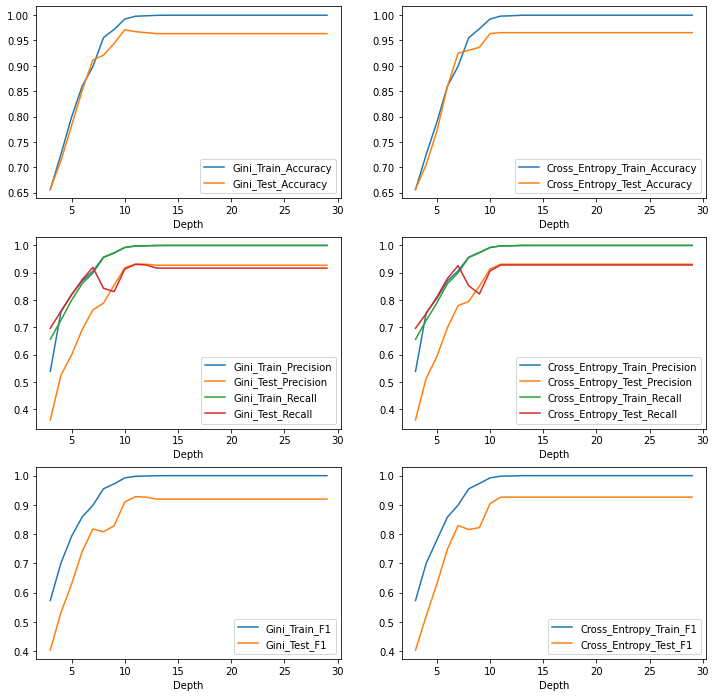

In [7]:
X_train = aug_data[["buying", "maint","doors","persons","lug_boot","safety"]]
Y_train = aug_data["target"]
X_test = test_data[["buying", "maint","doors","persons","lug_boot","safety"]]
Y_test = test_data["target"]

depth = []
gini_train_acc = []
gini_test_acc = []
cross_train_acc = []
cross_test_acc = []
gini_train_prec = []
gini_test_prec = []
cross_train_prec = []
cross_test_prec = []
gini_train_rec = []
gini_test_rec = []
cross_train_rec = []
cross_test_rec = []
gini_train_f1 = []
gini_test_f1 = []
cross_train_f1 = []
cross_test_f1 = []

for i in range(3, 30):
  depth.append(i)
  # Gini split criterion
  clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=0)
  clf_gini.fit(X_train, Y_train)
  y_train = clf_gini.predict(X_train)
  y_test = clf_gini.predict(X_test)
  gini_train_acc.append(accuracy_score(Y_train, y_train))
  gini_test_acc.append(accuracy_score(Y_test, y_test))
  gini_train_prec.append(precision_score(Y_train, y_train, average="macro"))
  gini_test_prec.append(precision_score(Y_test, y_test, average="macro"))
  gini_train_rec.append(recall_score(Y_train, y_train, average="macro"))
  gini_test_rec.append(recall_score(Y_test, y_test, average="macro"))
  gini_train_f1.append(f1_score(Y_train, y_train, average="macro"))
  gini_test_f1.append(f1_score(Y_test, y_test, average="macro"))
  # Cross Entropy split criterion
  clf_cross = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)
  clf_cross.fit(X_train, Y_train)
  y_train = clf_cross.predict(X_train)
  y_test = clf_cross.predict(X_test)
  cross_train_acc.append(accuracy_score(Y_train, y_train))
  cross_test_acc.append(accuracy_score(Y_test, y_test))
  cross_train_prec.append(precision_score(Y_train, y_train, average="macro"))
  cross_test_prec.append(precision_score(Y_test, y_test, average="macro"))
  cross_train_rec.append(recall_score(Y_train, y_train, average="macro"))
  cross_test_rec.append(recall_score(Y_test, y_test, average="macro"))
  cross_train_f1.append(f1_score(Y_train, y_train, average="macro"))
  cross_test_f1.append(f1_score(Y_test, y_test, average="macro"))

metrics = {'Depth':depth, 'Gini_Train_Accuracy':gini_train_acc, 'Gini_Test_Accuracy':gini_test_acc, 'Cross_Entropy_Train_Accuracy': cross_train_acc, 'Cross_Entropy_Test_Accuracy': cross_test_acc, "Gini_Train_Precision":gini_train_prec, "Gini_Test_Precision":gini_test_prec, "Cross_Entropy_Train_Precision":cross_train_prec, "Cross_Entropy_Test_Precision": cross_test_prec, "Gini_Train_Recall":gini_train_rec, "Gini_Test_Recall":gini_test_rec, "Cross_Entropy_Train_Recall":cross_train_rec, "Cross_Entropy_Test_Recall": cross_test_rec, "Gini_Train_F1":gini_train_f1, "Gini_Test_F1": gini_test_f1, "Cross_Entropy_Train_F1":cross_train_f1, "Cross_Entropy_Test_F1": cross_test_f1}
metrics = pd.DataFrame(metrics)

fig, ax = plt.subplots(3,2,figsize=(12,12))
metrics.plot(x="Depth", y=["Gini_Train_Accuracy","Gini_Test_Accuracy"], ax=ax[0][0]);
metrics.plot(x="Depth", y=["Cross_Entropy_Train_Accuracy", "Cross_Entropy_Test_Accuracy"], ax=ax[0][1]);
metrics.plot(x="Depth", y=["Gini_Train_Precision","Gini_Test_Precision"], ax=ax[1][0]);
metrics.plot(x="Depth", y=["Cross_Entropy_Train_Precision", "Cross_Entropy_Test_Precision"], ax=ax[1][1]);
metrics.plot(x="Depth", y=["Gini_Train_Recall","Gini_Test_Recall"], ax=ax[1][0]);
metrics.plot(x="Depth", y=["Cross_Entropy_Train_Recall", "Cross_Entropy_Test_Recall"], ax=ax[1][1]);
metrics.plot(x="Depth", y=["Gini_Train_F1","Gini_Test_F1"], ax=ax[2][0]);
metrics.plot(x="Depth", y=["Cross_Entropy_Train_F1", "Cross_Entropy_Test_F1"], ax=ax[2][1]);

## Analysing the final selected model

Training:
Accuracy =  0.9994110718492344
Precision =  0.9994110718492344
Recall =  0.9994114182775584
F1 Score =  0.9994110717471034
Test:
Accuracy =  0.9633911368015414
Precision =  0.9166878141016073
Recall =  0.9272237484737484
F1 Score =  0.9196654672099043
              precision    recall  f1-score   support

         acc       0.95      0.91      0.93       116
        good       0.84      0.95      0.89        22
       unacc       0.98      0.99      0.98       360
       vgood       0.94      0.81      0.87        21

    accuracy                           0.96       519
   macro avg       0.93      0.92      0.92       519
weighted avg       0.96      0.96      0.96       519



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


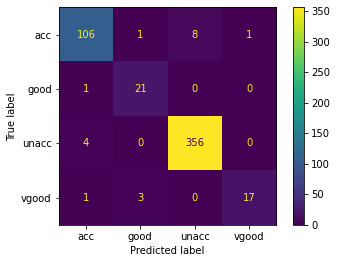

In [14]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=13)
clf.fit(X_train, Y_train)
y_train = clf.predict(X_train)
y_test = clf.predict(X_test)

print ("Training:")
print ("Accuracy = ", accuracy_score(y_train, Y_train))
print ("Precision = ", precision_score(y_train, Y_train, average="macro"))
print ("Recall = ", recall_score(y_train, Y_train, average="macro"))
print ("F1 Score = ", f1_score(y_train, Y_train, average="macro"))
print ("Test:")
print ("Accuracy = ", accuracy_score(y_test, Y_test))
print ("Precision = ", precision_score(y_test, Y_test, average="macro"))
print ("Recall = ", recall_score(y_test, Y_test, average="macro"))
print ("F1 Score = ", f1_score(y_test, Y_test, average="macro"))

print (classification_report(Y_test, y_test, target_names=["acc","good", "unacc","vgood"]))
plot_confusion_matrix(clf, X_test, Y_test, display_labels = ["acc","good", "unacc","vgood"]);

In [15]:
# To plot using dtreeviz
viz = dtreeviz(clf, x_data=X_train, y_data=Y_train, feature_names = ["buying", "maint","doors","persons","lug_boot","safety"])
viz

# # To plot the tree using graphviz
# dot_data = tree.export_graphviz(clf, out_file=None, feature_names=["buying", "maint","doors","persons","lug_boot","safety"], class_names=["0","1","2","3"], filled=True, rounded=True, special_characters=True) 
# graph = graphviz.Source(dot_data) 
# graph

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


## Cost complexity pruning

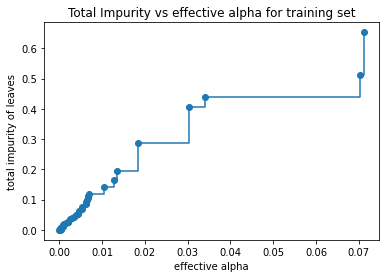

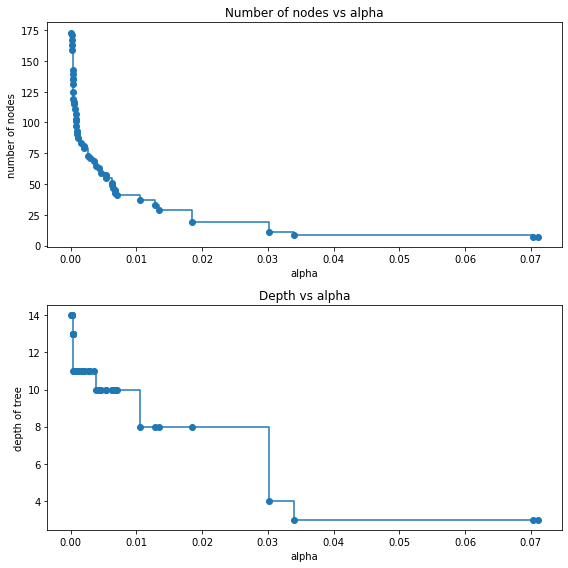

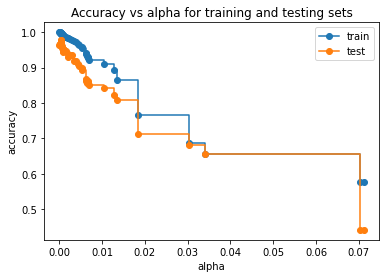

In [10]:
# Post pruning the decision tree
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Plotting the total impurities of leaf nodes vs alpha for training set
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots();
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post");
ax.set_xlabel("effective alpha");
ax.set_ylabel("total impurity of leaves");
ax.set_title("Total Impurity vs effective alpha for training set");

# List of all the classifiers
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

# Accuracy after post-pruning
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()